# Import libraries


In [1]:
%pip install pandas matplotlib numpy openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

import random

import numpy as np

import matplotlib.pyplot as plt

In [3]:
random.seed(42)

In [4]:
def init_data_set(data_set_name):
    print("Dataset loading...")
    df = pd.read_excel(data_set_name)
    print("Loading completed, your data has been successfully imported")
    return df

In [5]:
df = init_data_set("..\sharks.xlsx")

Dataset loading...
Loading completed, your data has been successfully imported


In [6]:
df.shape

(6448, 23)

In [7]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator-Source,pdf,href-formula,href,Case-Number,original-order,latitude,longitude
0,2019.08.27,27-Aug-2019,2019,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,11h55,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,6452,29.025819,-80.926998
1,2019.08.21,21-Aug-2019,2019,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,09h00,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,6451,26.122439,-80.137317
2,2019.08.20,20-Aug-2019,2019,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,08h00,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,6450,19.478244,-155.925927
3,2019.08.16,16-Aug-2019,2019,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,11h00,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,6449,29.025819,-80.926998
4,2019.08.11,11-Aug-2019,2019,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,19h30,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,6448,21.476358,-158.220366


In [8]:
df["Species"]

0             6.5' shark
1                    NaN
2                    NaN
3                    NaN
4       10' to 12' shark
              ...       
6443                 NaN
6444                 NaN
6445                 NaN
6446                 NaN
6447                 NaN
Name: Species, Length: 6448, dtype: object

In [9]:
def clean_shark_species(dataframe):
    # Suppr des lignes avec NaN
    print("Start cleaning...")
    dataframe = dataframe.dropna(subset=["Species"])
    dataframe["Species"] = dataframe["Species"].str.lower()

    # Remplacer "sharks" par "shark" dans la colonne "Species"
    print("Replace sharks with shark...")
    dataframe["Species"] = dataframe["Species"].str.replace(
        "sharks", "shark", case=False
    )

    # Suppr des espèces qui ont pas "Shark" comme mot clé
    print("Delete wrong species...")
    dataframe = dataframe[
        dataframe["Species"].str.contains("shark", case=False, na=False)
    ]

    # Clean des espèces de requins
    print("Species cleaning...")
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\d+(\.\d+)?\' shark", "unknown shark", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\d+\' to Unknown shark", "unknown shark", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\d+\'\s", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r'"(.+)"', r"\1", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\ba\s", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r".*? or ", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"shark.*", "shark", case=False, regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"Said to involve", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\b\d+(\.\d+)?\s*m\s*shark\b", "shark", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"reported", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"not shark", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\ba\b", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"no shark", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\d+", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"[/*\-\+.\'\[\]\(\),]", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r'[“"”]', "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(r"&", "", regex=True)
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"Not shark", "", regex=True
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(">", "", regex=False)
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace("<", "", regex=False)
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(";", "", regex=False)
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(":", "", regex=False)
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        "gray", "grey", regex=False
    )
    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        "colored", "", regex=False
    )

    mots_a_retirer = [
        "Juvenile",
        "juvenile",
        "an",
        "believed caused by",
        "small",
        "large",
        "Possibly",
        "A",
        "Injury",
        "most",
        "likely",
        "caused",
        "by",
        "tp",
        "pack",
        "of",
        "Description",
        "Reported",
        "as",
        "Thought",
        "to",
        "involve",
        "Some",
        "drowned",
        "but",
        "other",
        "may",
        "have",
        "been",
        "killed",
        "Remains",
        "recovered",
        "from",
        "Said",
        "be",
        "said",
        "tp",
        "m",
        "the",
        "Small",
        "possibly",
        "metre",
        "Allegedly",
        "kg",
        "female",
        "Fishermen",
        "partial",
        "remains",
        "possible",
        "Species",
        "very",
        "pregnant",
        "yearold",
        "pound",
        "lb",
        "Mr Burgess",
        "ISAF",
        "announced",
        "injury",
        "was",
        "bite",
        "year",
        "old",
        "was",
        "media",
        "it",
        "that",
        "spotted",
        "On",
        "anglers",
        "New Zealand",
        "caught",
        "Possibily",
        "Questionable",
        "were",
        "Moreno’s",
        "leg",
        "part",
        "his",
        "swim",
        "suit",
        "found",
        "in",
        "Teeth",
        "hull",
        "identified",
        "those",
        "According",
        "comrades",
        "great",
        "Tooth",
        "tooth",
        "cm",
        "Comrades",
        "Atkins",
        "Benjamin",
        "le",
        "boss",
        "local",
        "authorities",
        "speculated",
        "water",
        "survivors",
        "Reportedely",
        "thin",
        "long",
        "Jan",
        "washed",
        "Believed",
        "His hand",
        "Miami",
        "two",
        "gaffed",
        "fragment",
        "hooked",
        "shot",
        "hand",
        "gut",
        "alleged",
        "too",
        "cold",
        "for",
        "incident",
        "unidentified",
        "possiby",
        "though",
        "scalloped",
        "next",
        "morning",
        "fragments",
        "belly",
        "captive",
        "six",
        "larger",
        "several",
        "bitten",
        "attacked",
        "number",
        "little",
        "inflicted",
        "slim",
        "number",
        "attacked",
        "brown",
        "colored",
        "ta",
        "mere",
        "ashore",
        "young",
        "days",
        "later",
        "ly",
        "unknown",
        "browncolored",
        "whtietip",
        "dead",
    ]

    mots_a_retirer = [mot.lower() for mot in mots_a_retirer]

    for mot in mots_a_retirer:
        dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
            r"\b" + mot + r"\b", "", regex=True
        )

    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"\b\d+(\.\d+)?\s*m\s*to\s*\d+(\.\d+)?\s*m\s*\[to\s*\d+\'\]", "", regex=True
    )

    dataframe.loc[:, "Species"] = dataframe["Species"].replace("", "unknown shark")

    dataframe.loc[:, "Species"] = dataframe["Species"].str.strip()

    dataframe.loc[:, "Species"] = dataframe["Species"].str.replace(
        r"^\s*", "", regex=True
    )

    dataframe.loc[:, "Species"] = (
        dataframe["Species"].str.replace(r"\s+", " ", regex=True).str.strip()
    )

    dataframe.loc[
        dataframe["Species"].str.strip().str.lower() == "shark", "Species"
    ] = "unknown shark"

    return dataframe


df_sharks = clean_shark_species(df)

Start cleaning...
Replace sharks with shark...
Delete wrong species...
Species cleaning...


C:\Users\victo\AppData\Local\Temp\ipykernel_20476\3398834502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Species"] = dataframe["Species"].str.lower()
C:\Users\victo\AppData\Local\Temp\ipykernel_20476\3398834502.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Species"] = dataframe["Species"].str.replace(


In [10]:
df_sharks["Species"].unique()

array(['unknown shark', 'blacktip shark', 'spinner shark',
       'sandtiger shark', 'white shark', 'bull shark', 'lemon shark',
       'grey nurse shark', 'tiger shark', 'cookiecutter shark',
       'sand tiger shark', 'grey reef shark', 'wobbegong shark',
       'mako shark', 'reef shark', 'nurse shark',
       'oceanic whitetip shark', 'blue shark', 'salmon shark',
       'barracuda', 'tawny nurse shark', 'eel', 'galapagos shark',
       'sevengill shark', 'caribbean reef shark',
       'broadnose sevengill shark', 'angel shark', 'dogfish shark',
       'bronze whaler shark', 'silky shark', 'hammerhead shark',
       'foot shark', 'blacktip reef shark', 'raggedtooth shark',
       'goblin shark', 'sandbar shark', 'tawney nurse shark', 'cow shark',
       'gill shark', 'whitetip reef shark', 'porbeagle shark',
       'bronze whaler', 'port jackson shark', 'zambesi shark',
       'thresher shark', 'bronze whale shark', 'dusky shark',
       'starry smoothhound shark', 'basking shark',

In [11]:
import pandas as pd


# Liste des espèces à inclure
especes_a_inclure = [
    "Unknown shark",
    "Blacktip shark",
    "Spinner shark",
    "Sandtiger shark",
    "White shark",
    "Bull shark",
    "Lemon shark",
    "Grey nurse shark",
    "Tiger shark",
    "Cookiecutter shark",
    "Sand tiger shark",
    "Grey reef shark",
    "Wobbegong shark",
    "Mako shark",
    "Reef shark",
    "Nurse shark",
    "Oceanic whitetip shark",
    "reef shark",
    "Blue shark",
    "bull shark",
    "blacktip shark",
    "Salmon shark",
    "barracuda",
    "Tawny nurse shark",
    "white shark",
    "eel",
    "Galapagos shark",
    "nurse shark",
    "blue shark",
    "Sevengill shark",
    "Caribbean reef shark",
    "Broadnose sevengill shark",
    "Angel shark",
    "dogfish shark",
    "Bronze whaler shark",
    "Silky shark",
    "Hammerhead shark",
    "spinner shark",
    "foot shark",
    "Blacktip Reef shark",
    "oceanic whitetip shark",
    "Raggedtooth shark",
    "Goblin shark",
    "tiger shark",
    "Sandbar shark",
    "Tawney nurse shark",
    "Cow shark",
    "Blacktip reef shark",
    "gill shark",
    "Whitetip reef shark",
    "blacktip reef shark",
    "Porbeagle shark",
    "bronze whaler",
    "Port Jackson shark",
    "sandtiger shark",
    "Zambesi shark",
    "bronze whaler shark",
    "lemon shark",
    "hammerhead shark",
    "Thresher shark",
    "Bronze whale shark",
    "cookiecutter shark",
    "Dusky shark",
    "Starry smoothhound shark",
    "Basking shark",
    "Gray reef shark",
    "Sand shark",
    "catshark",
    "Silvertip shark",
    "mako shark",
    "copper shark",
    "Longfin mako shark",
    "black tipped shark",
    "sevengill shark",
    "brown shark",
    "Shortfin mako shark",
    "grey nurse shark",
    "greycolored shark",
    "cow shark",
    "sand shark",
    "captive shark",
    "grey colored shark",
    "Caribbean Reef shark",
    "bonnethed shark",
    "sandbar shark",
    "whaler shark",
    "blue shark",
    "tiger shark",
    "Leopard shark",
    "ground shark",
    "Whale shark",
    "blacktipped shark",
    "silky shark",
    "dusky shark",
    "silvertip shark",
    " Zambezi shark",
    "sandshark",
    "Zambezi shark",
    "Shovelnose sharkd",
    "school shark",
    "porbeagle shark",
    "gray shark",
    "thresher shark",
    "Carpet shark",
    "Copper shark",
    "blackfin shark",
    "dog shark",
    "saw shark",
    "Soupfin shark",
    "Shovelnose shark",
    "whiptail shark",
    "carlsmith shark",
    "red shark",
    "yellow shark",
    "loxodon",
    "banjo shark",
    "blacktail reef shark",
    "carcharinid shark",
    "bonita shark",
    "grey shark",
    "cocktail shark",
    "blue nose shark",
]

especes_a_inclure_minuscules = [espece.lower() for espece in especes_a_inclure]


# Créer un masque booléen pour les lignes qui ne sont pas dans la liste des espèces à inclure
masque = ~df_sharks["Species"].isin(especes_a_inclure_minuscules)

# Afficher les lignes qui ne sont pas dans la liste des espèces à inclure
lignes_non_incluses = df_sharks[masque]
print(lignes_non_incluses["Species"])

2120        black finned shark
3046    whitetipped reef shark
3870      broadnose gill shark
4624            speareye shark
5003          blue nosed shark
5085           bluenosed shark
Name: Species, dtype: object


In [12]:
df_sharks.shape

(3302, 23)

In [13]:
df_sharks = df_sharks.dropna(subset=["Species", "longitude", "latitude"])
df_sharks = df_sharks.reset_index(drop=True)
df_sharks.shape

(3145, 23)

In [14]:
# pd.set_option('display.max_rows', 200)

df_sharks.head(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator-Source,pdf,href-formula,href,Case-Number,original-order,latitude,longitude
0,2019.08.27,27-Aug-2019,2019,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,11h55,unknown shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,6452,29.025819,-80.926998
1,2019.08.11,11-Aug-2019,2019,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,19h30,unknown shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,6448,21.476358,-158.220366
2,2019.07.30,30-Jul-2019,2019,Provoked,USA,North Carolina,"Off Cape Hatteras, Dare County",Fishing,Rick Caton,M,...,NaN,blacktip shark,"K. McMurray, TrackingSharks.com",2019.07.30-Caton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.30,6443,35.248040,-75.539316
3,2019.07.27.a,27-Jul-2019,2019,Unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Surfing,Frank O'Rourke,M,...,NaN,spinner shark,"K. McMurray, TrackingSharks.com",2019.07.27.a-O'Rourke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.27.a,6439,30.284122,-81.396134
4,2019.07.22,22-Jul-2019,2019,Unprovoked,USA,Rhode Island,"Moonstone Beach, South Kingstown, Washington C...",Surfing,Chase Clary,M,...,18h30,sandtiger shark,"K. McMurray, TrackingSharks.com",2019.07.22-Clary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.22,6438,41.386572,-71.574745
5,2019.07.17.R,Reported 17-Jul-2019,2019,Unprovoked,NEW ZEALAND,Chatham Islands,Pitt Island or Chatham Island,Scuba diving,Val Croon,M,...,Morning,white shark,"M. Michelson, GSAF",2019.07.17.R-Croon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.17.R,6436,-44.289858,-176.226013
6,2019.07.16,16-Jul-2019,2019,Unprovoked,USA,North Carolina,"Sunset Beach, Brunswick County",Body-surfing,Melissa Chase,F,...,16h30,unknown shark,"C. Creswell, GSAF, K. McMurray, TrackingSh...",2019.07.16-Chase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.16,6435,33.880728,-78.512231
7,2019.07.10,10-Jul-2019,2019,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"East Beach, Port Alfred",Surfing,Dusty Phelan,M,...,10h30,white shark,"K. McMurray, TrackingSharks.com",2019.07.10-Phelan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.10,6433,-33.597778,26.905278
8,2019.07.09,09-Jul-2019,2019,Unprovoked,AUSTRALIA,Queensland,"Pelican Waters, Caloundra",Paddle boarding,Craig McDougall,M,...,08h00,bull shark,"Yahoo News Australia, 7/9/2019",2019.07.09-McDougall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.07.09,6432,-26.799000,153.133000
9,2019.06.16.a,16-Jun-2019,2019,Unprovoked,USA,Georgia,"Wilmington River, Chatham County",Swimming,Gene Brooks,M,...,09h00,bull shark,"K. McMurray, TrackingSharks.com",2019.06.16.a-Brooks.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.06.16.a,6424,31.994443,-80.996972


In [15]:
df_sharks["Species"].unique()

array(['unknown shark', 'blacktip shark', 'spinner shark',
       'sandtiger shark', 'white shark', 'bull shark', 'lemon shark',
       'grey nurse shark', 'tiger shark', 'cookiecutter shark',
       'grey reef shark', 'wobbegong shark', 'mako shark', 'reef shark',
       'nurse shark', 'oceanic whitetip shark', 'blue shark',
       'salmon shark', 'barracuda', 'tawny nurse shark', 'eel',
       'galapagos shark', 'sevengill shark', 'caribbean reef shark',
       'broadnose sevengill shark', 'angel shark', 'dogfish shark',
       'bronze whaler shark', 'silky shark', 'hammerhead shark',
       'foot shark', 'blacktip reef shark', 'raggedtooth shark',
       'goblin shark', 'sandbar shark', 'tawney nurse shark', 'cow shark',
       'gill shark', 'whitetip reef shark', 'porbeagle shark',
       'bronze whaler', 'port jackson shark', 'zambesi shark',
       'thresher shark', 'bronze whale shark', 'dusky shark',
       'starry smoothhound shark', 'basking shark', 'sand shark',
       'silv

In [16]:
print(df_sharks.shape)
df_sharks = df_sharks[df_sharks["Species"].str.lower() != "unknown shark"]

# Réindexer le DataFrame après la suppression des lignes
df_sharks = df_sharks.reset_index(drop=True)
print(df_sharks.shape)

df_sharks = df_sharks.dropna(subset=["Species"])

# Réindexer le DataFrame après la suppression des lignes
df_sharks = df_sharks.reset_index(drop=True)

print(df_sharks.shape)

(3145, 23)
(1885, 23)
(1885, 23)


In [17]:
df_sharks["Species"].unique()

array(['blacktip shark', 'spinner shark', 'sandtiger shark',
       'white shark', 'bull shark', 'lemon shark', 'grey nurse shark',
       'tiger shark', 'cookiecutter shark', 'grey reef shark',
       'wobbegong shark', 'mako shark', 'reef shark', 'nurse shark',
       'oceanic whitetip shark', 'blue shark', 'salmon shark',
       'barracuda', 'tawny nurse shark', 'eel', 'galapagos shark',
       'sevengill shark', 'caribbean reef shark',
       'broadnose sevengill shark', 'angel shark', 'dogfish shark',
       'bronze whaler shark', 'silky shark', 'hammerhead shark',
       'foot shark', 'blacktip reef shark', 'raggedtooth shark',
       'goblin shark', 'sandbar shark', 'tawney nurse shark', 'cow shark',
       'gill shark', 'whitetip reef shark', 'porbeagle shark',
       'bronze whaler', 'port jackson shark', 'zambesi shark',
       'thresher shark', 'bronze whale shark', 'dusky shark',
       'starry smoothhound shark', 'basking shark', 'sand shark',
       'silvertip shark', 'ca

In [18]:
def exporter_donnees(df_sharks):
    df_sharks.to_csv("sharks_cleaned.csv", index=False)
    print(f"Données exportées au format CSV.")

    df_sharks.to_excel("sharks_cleaned.xlsx", index=False)
    print(f"Données exportées au format Excel (XLSX).")

    df_sharks.to_json("sharks_cleaned.json", orient="records")
    print(f"Données exportées au format JSON.")


exporter_donnees(df_sharks)

Données exportées au format CSV.
Données exportées au format Excel (XLSX).
Données exportées au format JSON.


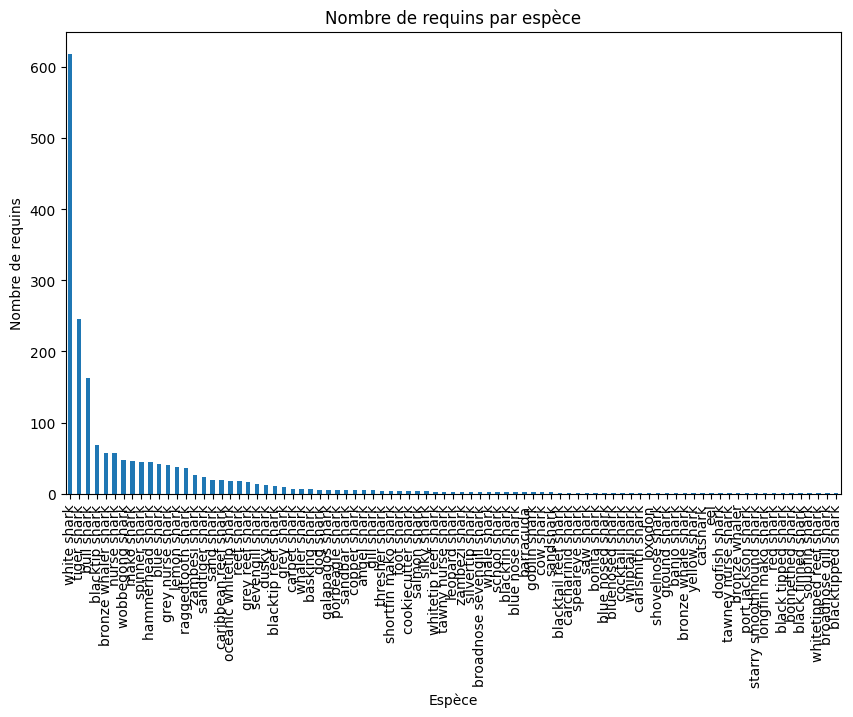

In [19]:
import matplotlib.pyplot as plt

# Exemple d'utilisation :
# Supposons que votre DataFrame s'appelle df
# df = ...

# Compter le nombre de requins par espèce
nombre_requins_par_espece = df_sharks["Species"].value_counts()

# Affichage du graphique
plt.figure(figsize=(10, 6))
nombre_requins_par_espece.plot(kind="bar")
plt.title("Nombre de requins par espèce")
plt.xlabel("Espèce")
plt.ylabel("Nombre de requins")
plt.show()

# Generate shark information


In [20]:
# Define the name and range for each characteristic
characteristics = {
    "nez_taille_oeil": (1, 10),
    "nez_longueur_museau": (5, 15),
    "nez_largeur_museau": (2, 15),
    "nez_epaisseur": (1, 15),
    "gueule_taille_dent": (1.3, 5.1),
    "gueule_ecart_machoire": (20, 100),
    "aileronHaut_longueur": (5, 20),
    "aileronHaut_largeur": (2, 10),
    "tronc_longueur": (2, 10),
    "tronc_epaisseur": (1, 8),
    "tronc_largeur": (2, 10),
    "aileronBas_longueur": (5, 20),
    "aileronBas_largeur": (2, 10),
    "queue_taille_aileron": (5, 20),
    "queue_longueur": (5, 30),
    "aileronArriere_longueur": (1, 6),
    "aileronArriere_largeur": (1, 4),
    "bas_longueur": (2, 10),
    "bas_epaisseur": (1, 6),
    "bas_largeur": (2, 8),
}

In [21]:
modifier_species = {
    species: {
        name: (
            random.uniform(
                min * (1 + ((max - min) / (20 * max))),
                max * (1 - ((max - min) / (20 * max))),
            ),
            random.uniform((max - min) / (10 * max), (max - min) / 2),
        )
        for name, (min, max) in characteristics.items()
    }
    for species in df_sharks["Species"].unique()
}

Create properties and columns names


In [22]:
properties = []
columns = ["case_number", "species"] + list(characteristics.keys())

For each attacks, we will create value for each properties


In [23]:
for index, attack in df_sharks.iterrows():
    prop = [attack["Case Number"], attack["Species"]]
    for characteristic, characteristic_range in characteristics.items():
        prop.append(
            round(
                min(
                    max(
                        random.gauss(
                            *modifier_species[attack["Species"]][characteristic]
                        ),
                        characteristic_range[0],
                    ),
                    characteristic_range[1],
                ),
                2,
            )
        )
    properties.append(prop)

Add data if not many sharks for a species


In [24]:
species_less_than_20 = df_sharks["Species"].value_counts()
species_less_than_20 = species_less_than_20[species_less_than_20 < 20]
i = 0
for species in species_less_than_20.index.tolist():
    for j in range(20 - species_less_than_20[species]):
        prop = ["DataShark" + str(i), species]
        for characteristic, characteristic_range in characteristics.items():
            prop.append(
                round(
                    min(
                        max(
                            random.gauss(*modifier_species[species][characteristic]),
                            characteristic_range[0],
                        ),
                        characteristic_range[1],
                    ),
                    2,
                )
            )
        i += 1
        properties.append(prop)

Convert to dataframe


In [25]:
df_prop = pd.DataFrame(properties, columns=columns)

df_prop.head()

,case_number,species,nez_taille_oeil,nez_longueur_museau,nez_largeur_museau,nez_epaisseur,gueule_taille_dent,gueule_ecart_machoire,aileronHaut_longueur,aileronHaut_largeur,...,tronc_largeur,aileronBas_longueur,aileronBas_largeur,queue_taille_aileron,queue_longueur,aileronArriere_longueur,aileronArriere_largeur,bas_longueur,bas_epaisseur,bas_largeur
0,2019.07.30,blacktip shark,6.18,7.47,15.00,13.45,2.85,55.90,5.00,5.01,...,9.08,9.94,8.77,6.13,30.00,1.91,2.94,4.28,3.78,6.99
1,2019.07.27.a,spinner shark,7.13,7.20,3.45,5.23,3.17,52.17,5.00,8.08,...,8.29,13.87,3.87,8.42,15.44,3.50,3.49,7.00,6.00,4.15
2,2019.07.22,sandtiger shark,5.04,8.02,5.97,14.14,1.49,20.00,15.63,2.96,...,2.00,12.69,2.00,7.57,14.64,4.82,2.46,6.47,1.00,6.33
3,2019.07.17.R,white shark,9.53,11.94,2.00,1.00,5.10,44.33,20.00,5.16,...,4.55,6.21,6.09,10.44,5.00,6.00,2.19,2.54,1.00,4.21
4,2019.07.10,white shark,9.25,9.38,2.42,1.00,2.31,38.90,20.00,4.47,...,9.58,5.00,4.18,13.47,12.12,5.24,1.11,2.25,3.66,3.88


Export properties


In [26]:
df_prop.to_csv("sharks_individuals.csv", index=False)


print(f"Données exportées au format CSV.")


df_prop.to_excel("sharks_individuals.xlsx", index=False)


print(f"Données exportées au format Excel (XLSX).")


df_prop.to_json("sharks_individuals.json", orient="records")


print(f"Données exportées au format JSON.")

Données exportées au format CSV.
Données exportées au format Excel (XLSX).
Données exportées au format JSON.


Define function to display information from properties


In [ ]:
custom_color = "#7578c8"


def bar_chart_shark(species, characteristic):
    # Choose a specific species and characteristic for the bar chart

    selected_species = species

    selected_characteristic = characteristic

    # Filter the DataFrame for the selected species and characteristic

    selected_data = df_prop.loc[
        df_prop["species"] == selected_species, ["species", selected_characteristic]
    ]

    # Calculate the median value for the selected characteristic

    median_value = (
        df_prop.groupby("species")[selected_characteristic]
        .median()
        .loc[selected_species]
    )

    # Plotting the bar chart with thick columns and equal spacing

    plt.figure(figsize=(25, 6))

    bar_width = 0.8  # Adjust the width of the bars as needed

    # Create an array of equally spaced indices for the x-axis

    indices = np.arange(len(selected_data))

    # Generate a bar plot with thick columns and equal spacing

    bars = plt.bar(
        indices,
        selected_data[selected_characteristic],
        width=bar_width,
        color=custom_color,
    )

    # Add a line for the median value

    plt.axhline(
        y=median_value, color="red", linestyle="--", linewidth=2, label="Median"
    )

    # Enhance the plot with labels and title

    plt.title(f"{selected_characteristic} for {selected_species} Individuals")

    plt.xlabel("Individuals")

    plt.ylabel(selected_characteristic)

    # Rotate x-axis labels for better readability

    plt.xticks(
        indices, [f"#{i+1}" for i in selected_data.index], rotation=45, ha="right"
    )

    # Add legend

    plt.legend()

    plt.tight_layout()  # Adjust layout for better readability

    plt.show()


def spider_chart_shark(species, group):
    # Calculate the median values for each characteristic across all individuals

    median_values = df_prop.drop("case_number", axis=1).groupby("species").median()

    # Filter the median values for the selected species

    selected_median = median_values.loc[species]

    # Filter characteristics belonging to the selected group

    selected_group_characteristics = {
        key: value for key, value in characteristics.items() if key.startswith(group)
    }

    # Scale the values based on the selected group's characteristic ranges

    scaled_values = [
        (selected_median[characteristic] - value_range[0])
        / (value_range[1] - value_range[0])
        for characteristic, value_range in selected_group_characteristics.items()
    ]

    # Plotting the spider chart

    plt.figure(figsize=(40, 6))

    # Number of characteristics

    num_characteristics = len(scaled_values)

    # Calculate angles for each characteristic

    angles = np.linspace(0, 2 * np.pi, num_characteristics, endpoint=False).tolist()

    # Make the plot circular

    scaled_values += scaled_values[:1]

    angles += angles[:1]

    # Plot the spider chart
    plt.polar(
        angles,
        scaled_values,
        marker="o",
        linestyle="solid",
        linewidth=2,
        color=custom_color,
        alpha=0.7,
    )

    # Fill the area under the curve

    plt.fill(angles, scaled_values, color=custom_color, alpha=0.4)

    # Enhance the plot with labels and title
    plt.title(
        f"Spider Chart pour le {group.capitalize()} des {species} (Valeur Médiane)"
    )

    plt.xticks(
        angles[:-1],
        [
            characteristic.replace(group + "_", "")
            for characteristic in selected_group_characteristics.keys()
        ],
    )

    plt.yticks(np.linspace(0, 1, 5), color="grey", size=8)  # Adjust y-axis ticks

    plt.grid(True)

    plt.show()

Display charts


In [ ]:
bar_chart_shark("bull shark", "nez_longueur_museau")
bar_chart_shark("bull shark", "nez_largeur_museau")
bar_chart_shark("bull shark", "nez_taille_oeil")
bar_chart_shark("bull shark", "nez_epaisseur")

bar_chart_shark("gill shark", "nez_longueur_museau")
bar_chart_shark("gill shark", "nez_largeur_museau")
bar_chart_shark("gill shark", "nez_taille_oeil")
bar_chart_shark("gill shark", "nez_epaisseur")

spider_chart_shark("bull shark", "nez")
spider_chart_shark("gill shark", "nez")

In [ ]:
print(modifier_species)